# 改进人马识别卷积神经网络(Dropout正则化)
主要参考于[DeepLearning.ai课程](https://github.com/lmoroney/dlaicourse/blob/master/Horse-or-Human-WithDropouts.ipynb)

在Course2中的Part3部分，我们已经实现对区分人马的卷积神经网络进行数据上的扩增的改进，在本节中，我们使用Dropout的方式来改进该CNN,防止其过拟合，使该卷积神经网络具有更好的性能。

## 1. 数据准备

In [6]:
import os
import zipfile

# 解压训练集数据
local_zip = './tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./tmp/horse-or-human')

# 解压测试集数据
local_zip = './tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./tmp/validation-horse-or-human')
zip_ref.close()

# 获得训练集的数据的路径
train_horse_dir = os.path.join('./tmp/horse-or-human/horses')

train_human_dir = os.path.join('./tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('./tmp/validation-horse-or-human/horses')

validation_human_dir = os.path.join('./tmp/validation-horse-or-human/humans')

print(train_human_dir)

print(validation_human_dir)

./tmp/horse-or-human/humans
./tmp/validation-horse-or-human/humans


## 2. 从头构建一个小模型

In [9]:
import tensorflow as tf

# 构建模型
model = tf.keras.models.Sequential([
    # 注意输入图像的维度大小、第一层采用卷积层
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 第二层卷积层
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    # 使用Dropout正则化
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 第三层卷积层
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    # 使用Dropout正则化
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 第四层卷积层
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 第五层卷积层
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 将数据展平喂给标准神经网络
    tf.keras.layers.Flatten(),
    # 使用Dropout正则化
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation='relu'),
    
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [10]:
# 编译模型
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=1e-4),
             metrics=['accuracy'])

## 3. 使用数据扩增的数据生成器

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    './tmp/horse-or-human/',
    target_size=(300,300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    './tmp/validation-horse-or-human/',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## 4. 训练模型并且分析精确率


In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/10
8/8 [==============================] - 99s 12s/step - loss: 0.5974 - accuracy: 0.6963 - val_loss: 0.6635 - val_accuracy: 0.5039
Epoch 2/10
8/8 [==============================] - 99s 12s/step - loss: 0.6071 - accuracy: 0.6830 - val_loss: 0.6557 - val_accuracy: 0.5078
Epoch 3/10
8/8 [==============================] - 101s 13s/step - loss: 0.6068 - accuracy: 0.7141 - val_loss: 0.6714 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 98s 12s/step - loss: 0.5507 - accuracy: 0.7386 - val_loss: 0.6609 - val_accuracy: 0.5078
Epoch 5/10
8/8 [==============================] - 98s 12s/step - loss: 0.6576 - accuracy: 0.7041 - val_loss: 0.6723 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 99s 12s/step - loss: 0.5288 - accuracy: 0.7186 - val_loss: 0.6516 - val_accuracy: 0.5078
Epoch 7/10
8/8 [==============================] - 98s 12s/step - loss: 0.51

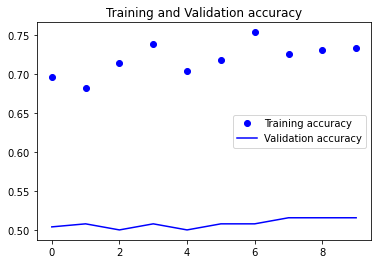

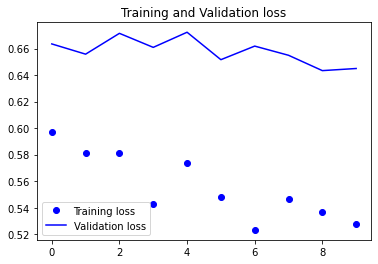

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation accuracy')
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title("Training and Validation loss")

plt.legend()

plt.show()